In [21]:
# Project Name - CUSTOMER SEGMENTATION AND PRODUCT RECOMMENDATION IN E-COMMERCE.

In [22]:
# Step 1 - Import Required Libraries

import pandas as pd
import numpy as np

In [23]:
# Step 2 - Upload the Dataset

from google.colab import files
uploaded = files.upload()

Saving Retail.csv to Retail.csv


In [24]:
# Step 3 - Load the Dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['Retail.csv']), encoding='ISO-8859-1')

In [25]:
# Step 4 - Check Dataset Dimensions and Data Types

print("🔹 Dataset Dimensions:", df.shape)
print("\n🔹 Column Data Types:\n", df.dtypes)

🔹 Dataset Dimensions: (541909, 8)

🔹 Column Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [26]:
# Step 5 - Check for Missing Values

missing_values = df.isnull().sum()
print("🔹 Missing Values per Column:\n", missing_values)

🔹 Missing Values per Column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [27]:
# Step 6 - Check for Duplicate Rows

duplicate_count = df.duplicated().sum()
print("🔹 Number of Duplicate Rows:", duplicate_count)

🔹 Number of Duplicate Rows: 5268


In [28]:
# Step 7 - Find Unusual Records

# Unusual rows like -
# - Missing CustomerID
# - Missing Description
# - Quantity <= 0
# - UnitPrice <= 0

unusual_records = df[
    (df['CustomerID'].isnull()) |
    (df['Description'].isnull()) |
    (df['Quantity'] <= 0) |
    (df['UnitPrice'] <= 0)
]
print(f"🔹 Number of Unusual Records: {len(unusual_records)}")
unusual_records.head(100)  # Display first 100 unusual records

🔹 Number of Unusual Records: 144025


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
1525,536544,22169,FAMILY ALBUM WHITE PICTURE FRAME,1,2022-12-01 14:32:00,16.98,NaN,United Kingdom
1526,536544,22174,PHOTO CUBE,2,2022-12-01 14:32:00,3.36,NaN,United Kingdom
1527,536544,22178,VICTORIAN GLASS HANGING T-LIGHT,13,2022-12-01 14:32:00,2.51,NaN,United Kingdom
1528,536544,22182,CAKE STAND VICTORIAN FILIGREE SMALL,1,2022-12-01 14:32:00,4.21,NaN,United Kingdom


In [29]:
# Step 8 - Data Preprocessing

# Remove rows where CustomerID is missing
df = df.dropna(subset=['CustomerID'])
print("Rows after removing missing CustomerID:", df.shape[0])

# Exclude invoices that start with 'C' (cancelled transactions)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print("Rows after removing cancelled invoices:", df.shape[0])

# Remove rows with non-positive quantity
df = df[df['Quantity'] > 0]
print("Rows after removing Quantity <= 0:", df.shape[0])

# Remove rows with non-positive unit price
df = df[df['UnitPrice'] > 0]
print("Rows after removing UnitPrice <= 0:", df.shape[0])

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Display cleaned dataset shape
print("✅ Final Cleaned Dataset Shape:", df.shape)

# Preview the cleaned data
df.head(100)

Rows after removing missing CustomerID: 406829
Rows after removing cancelled invoices: 397924
Rows after removing Quantity <= 0: 397924
Rows after removing UnitPrice <= 0: 397884
✅ Final Cleaned Dataset Shape: (397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2022-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2022-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2022-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2022-12-01 09:37:00,0.55,14688.0,United Kingdom


Top 10 Countries by Number of Transactions:
Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64


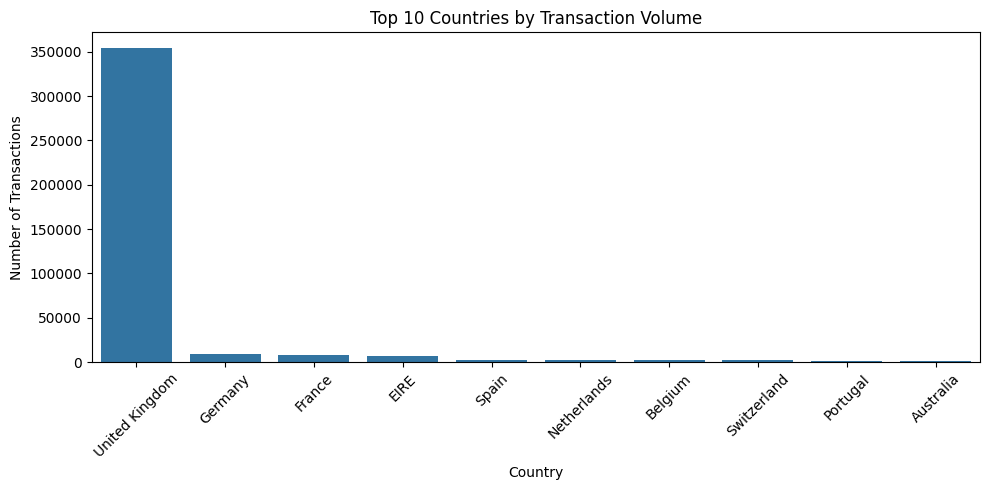

Top 10 Selling Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


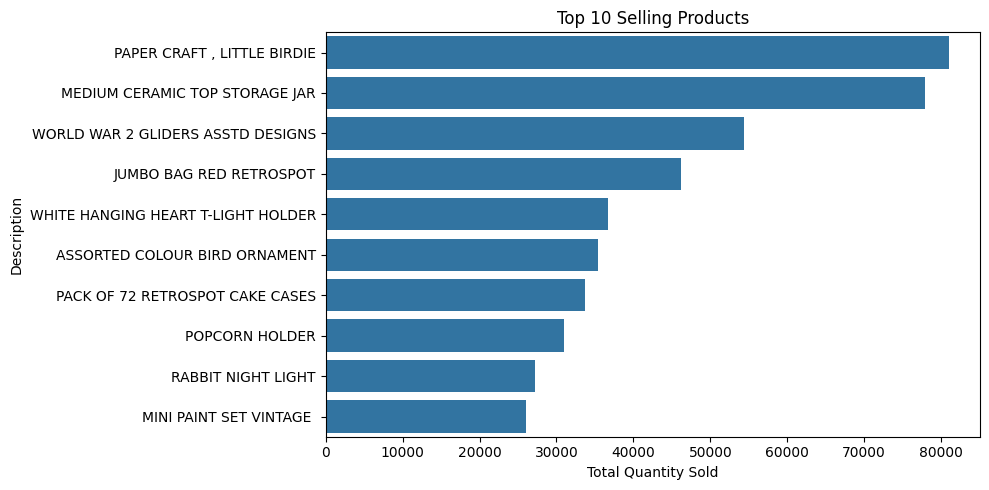

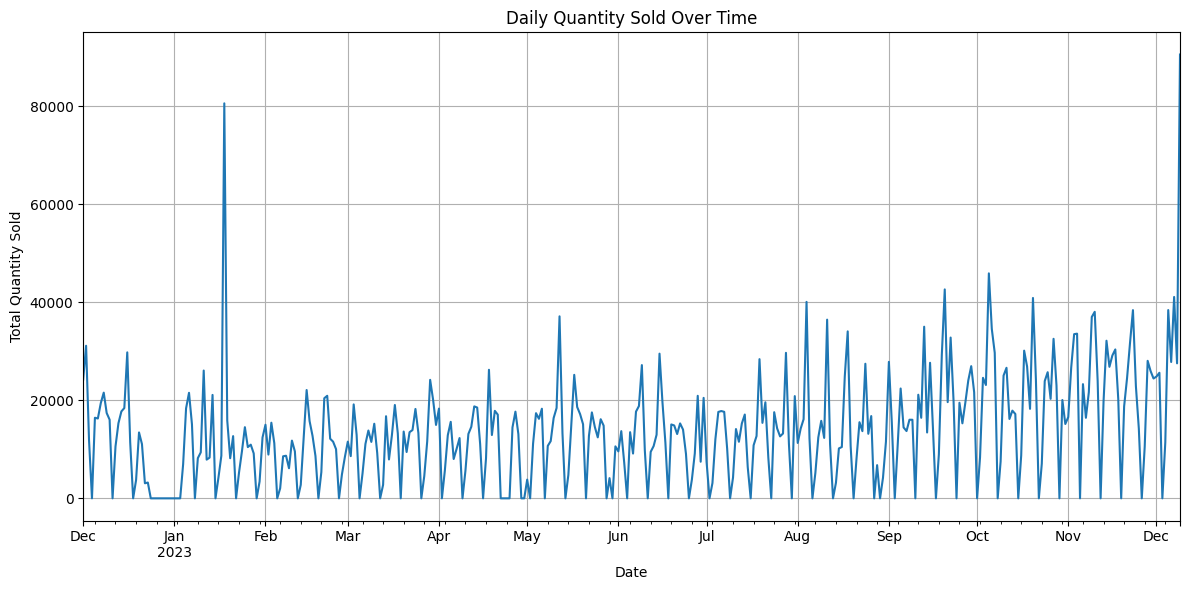

Avg Spend per Invoice: 480.86595639974104
Avg Spend per Customer: 2054.2664601198708


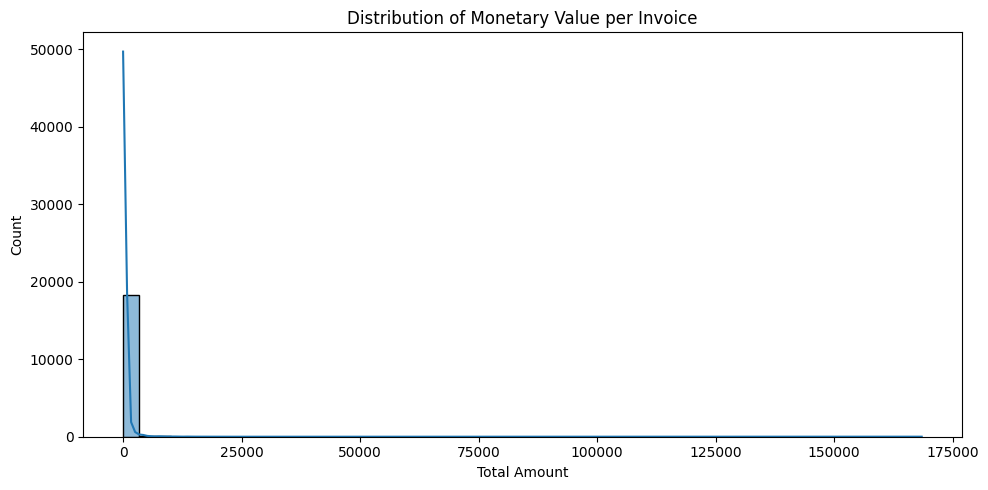

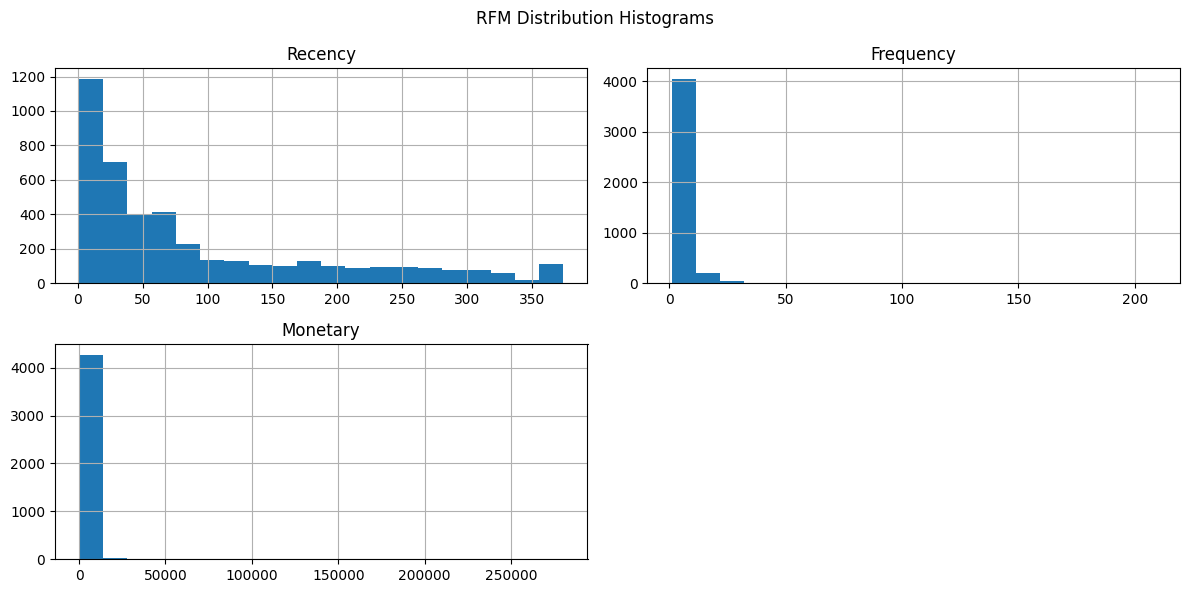

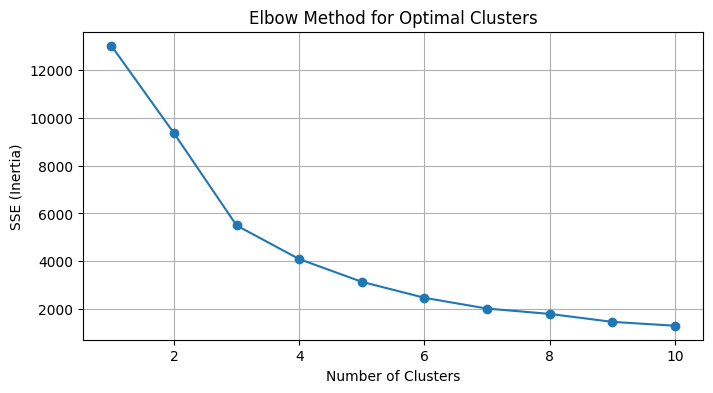

Cluster Profile (RFM Averages):
            Recency  Frequency       Monetary
Cluster                                      
0         43.702685   3.682711    1359.049284
1        248.075914   1.552015     480.617480
2          7.384615  82.538462  127338.313846
3         15.500000  22.333333   12709.090490


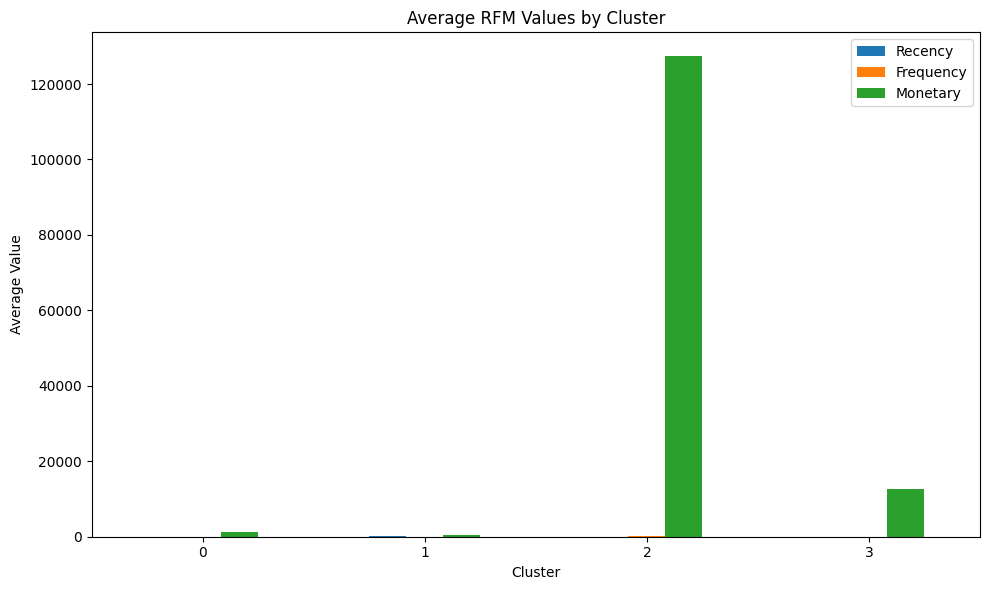

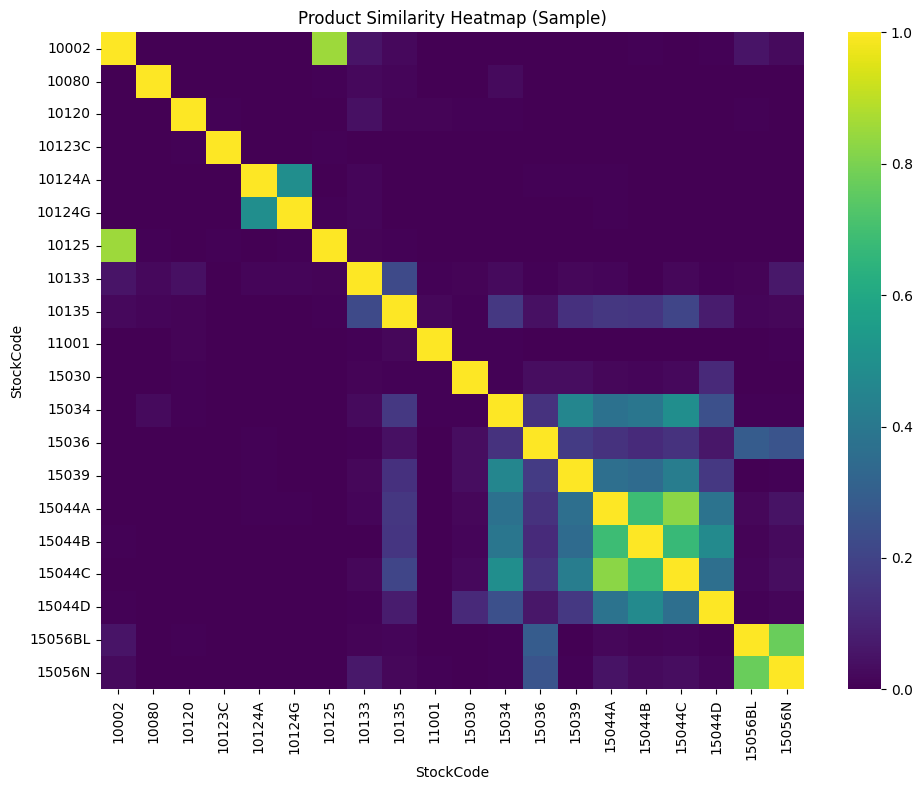

In [48]:
# Step 9 - Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


# Transaction Volume by Country
country_counts = df['Country'].value_counts()
print("Top 10 Countries by Number of Transactions:")
print(country_counts.head(10))
# Plotting
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Transaction Volume")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Top-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products:")
print(top_products)
# Plotting
plt.figure(figsize=(10, 5))
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.tight_layout()
plt.show()



# Purchase Trends Over Time
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Group by date
daily_sales = df.set_index('InvoiceDate').resample('D')['Quantity'].sum()
# Plotting
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Daily Quantity Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()



# Monetary distribution per transaction and customer
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# Total spend per invoice
invoice_totals = df.groupby('InvoiceNo')['TotalPrice'].sum()
# Total spend per customer
customer_totals = df.groupby('CustomerID')['TotalPrice'].sum()
# Display summaries
print("Avg Spend per Invoice:", invoice_totals.mean())
print("Avg Spend per Customer:", customer_totals.mean())
# Plotting
invoice_totals = df.groupby('InvoiceNo')['TotalPrice'].sum()
plt.figure(figsize=(10, 5))
sns.histplot(invoice_totals, bins=50, kde=True)
plt.title("Distribution of Monetary Value per Invoice")
plt.xlabel("Total Amount")
plt.tight_layout()
plt.show()



# RFM distributions
# RFM Feature Engineering
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
# Plotting
rfm.hist(figsize=(12, 6), bins=20)
plt.suptitle("RFM Distribution Histograms")
plt.tight_layout()
plt.show()



# Elbow curve for cluster selection
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
# Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
# Plotting
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()



# Customer cluster profiles
# Choose optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
# Cluster averages
cluster_profiles = rfm.groupby('Cluster').mean()
print("Cluster Profile (RFM Averages):")
print(cluster_profiles)
# Plotting
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title("Average RFM Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Product recommendation Heatmap
# Create Customer × Product matrix (binary: product bought or not)
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
# Cosine similarity between products
product_similarity = cosine_similarity(product_matrix.T)
# Convert to DataFrame
product_similarity_df = pd.DataFrame(product_similarity, index=product_matrix.columns, columns=product_matrix.columns)
# Plotting
sample = product_similarity_df.iloc[:20, :20]
plt.figure(figsize=(10, 8))
sns.heatmap(sample, cmap="viridis")
plt.title("Product Similarity Heatmap (Sample)")
plt.tight_layout()
plt.show()

In [50]:
# Step 10 - Clustering Methodology

# Step 10.1 - RFM Feature Engineering

# RFM Calculation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})
# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
# Show sample
rfm.head(100)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
95,12462.0,19,2,1189.59
96,12463.0,53,4,1344.78
97,12464.0,10,8,1212.05
98,12465.0,17,2,742.19


In [51]:
# Step 10.2 - Standardize RFM Values

from sklearn.preprocessing import StandardScaler
# Scale RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

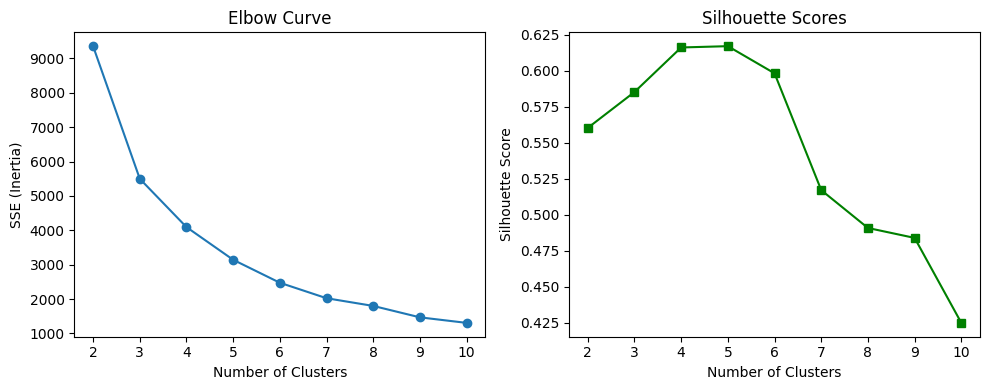

In [55]:
# Step 10.3 - Elbow Method and Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)
# Plot Elbow Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

In [56]:
# Step 10.4 - Run KMeans Clustering

# Choose optimal k based on Elbow & Silhouette
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
# Show labeled RFM table
rfm.head(100)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
...,...,...,...,...,...
95,12462.0,19,2,1189.59,0
96,12463.0,53,4,1344.78,0
97,12464.0,10,8,1212.05,0
98,12465.0,17,2,742.19,0


In [58]:
# Step 10.5 - Cluster Profiling and Segment Labels

# Analyze cluster characteristics
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
# Add meaningful labels manually based on analysis
def label_cluster(row):
    if row['Recency'] <= rfm['Recency'].quantile(0.25) and row['Frequency'] >= rfm['Frequency'].quantile(0.75):
        return 'High-Value'
    elif row['Frequency'] >= rfm['Frequency'].quantile(0.5):
        return 'Regular'
    elif row['Frequency'] <= rfm['Frequency'].quantile(0.25) and row['Recency'] > rfm['Recency'].quantile(0.75):
        return 'At-Risk'
    else:
        return 'Occasional'
rfm['Segment'] = rfm.apply(label_cluster, axis=1)
# View sample
rfm[['CustomerID', 'Cluster', 'Segment']].head(100)

,CustomerID,Cluster,Segment
0,12346.0,3,At-Risk
1,12347.0,0,High-Value
2,12348.0,0,Regular
3,12349.0,0,Occasional
4,12350.0,1,At-Risk
...,...,...,...
95,12462.0,0,Regular
96,12463.0,0,Regular
97,12464.0,0,High-Value
98,12465.0,0,Regular


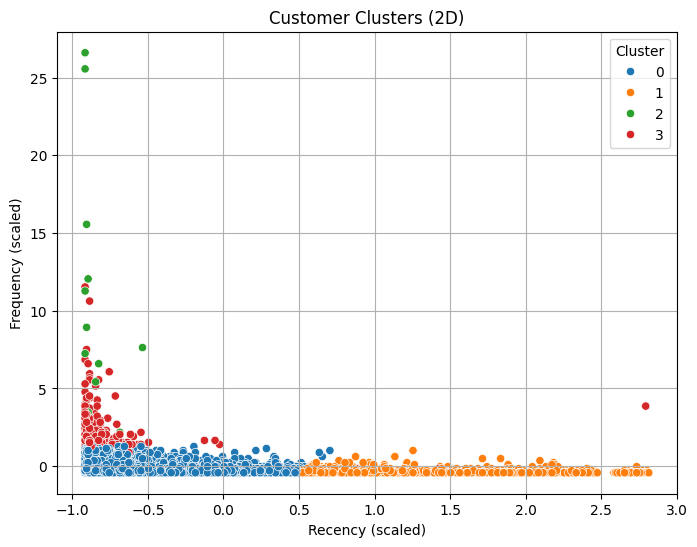

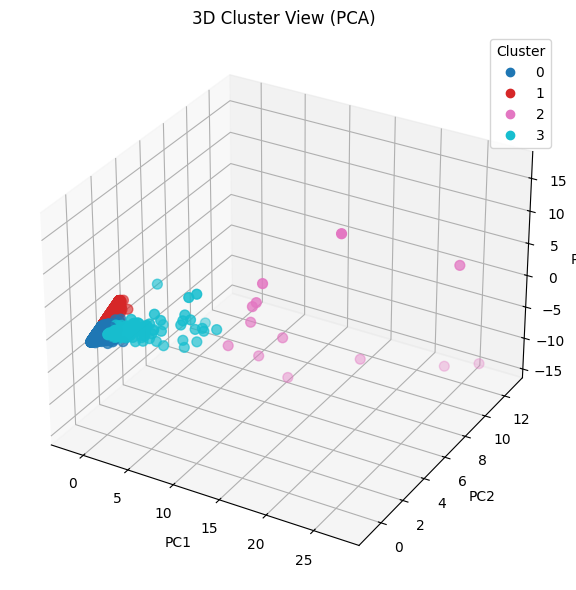

In [59]:
# Step 10.6 - Cluster Visualization (2D & 3D)

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# 2D Scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm['Cluster'], palette='tab10')
plt.title("Customer Clusters (2D)")
plt.xlabel("Recency (scaled)")
plt.ylabel("Frequency (scaled)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
# 3D Scatter using PCA
pca = PCA(n_components=3)
rfm_pca = pca.fit_transform(rfm_scaled)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_pca[:, 0], rfm_pca[:, 1], rfm_pca[:, 2], c=rfm['Cluster'], cmap='tab10', s=50)
ax.set_title("3D Cluster View (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

In [84]:
# Step 10.7 - Save Final Model and Segment Table for Streamlit

import joblib
# Save scaler and model
joblib.dump(scaler, 'rfm_scaler.pkl')
joblib.dump(kmeans, 'rfm_kmeans_model.pkl')
# Export RFM with cluster and segment labels
rfm.to_csv('rfm_clustered.csv', index=False)
print("✅ Model and Segmentation Data saved!")

✅ Model and Segmentation Data saved!


In [85]:
# Step 11 - Recommendation System

from sklearn.metrics.pairwise import cosine_similarity
# Create matrix of customers × products
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
product_matrix.shape  # Rows = customers, Columns = unique products
# Compute cosine similarity between product vectors (columns)
cos_sim = cosine_similarity(product_matrix.T)
# Create similarity DataFrame
product_sim_df = pd.DataFrame(cos_sim, index=product_matrix.columns, columns=product_matrix.columns)
# Create product code to name mapping
product_map = df[['StockCode', 'Description']].drop_duplicates().dropna().set_index('StockCode')['Description'].to_dict()
# Optional reverse mapping if needed
name_to_code = {v: k for k, v in product_map.items()}
# Product Recommendation Function
def recommend_similar_products(product_name, top_n=5):
    if product_name not in name_to_code:
        print("❌ Product not found in dataset.")
        return
    product_code = name_to_code[product_name]
    if product_code not in product_sim_df:
        print("❌ No purchase data found for this product.")
        return
    similar_codes = product_sim_df[product_code].sort_values(ascending=False)[1:top_n+1]
    recommendations = [(product_map.get(code, "Unknown Product"), score) for code, score in similar_codes.items()]
    print(f"\n📦 Top {top_n} products similar to '{product_name}':\n")
    for i, (desc, score) in enumerate(recommendations, 1):
        print(f"{i}. {desc} (Similarity: {score:.2f})")

In [101]:
# Step 11 - Streamlit App

app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics.pairwise import cosine_similarity

# Page Config
st.set_page_config(page_title="Shopper Spectrum", layout="wide")

# Custom CSS Styling
st.markdown("""
    <style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;600;800&display=swap');
    html, body, [class*="css"] {
        font-family: 'Poppins', sans-serif;
        background: linear-gradient(to right, #11998e, #38ef7d); /* Vibrant green gradient */
        background-attachment: fixed;
        color: #ffffff;
    }
    .main {
        background-color: rgba(0, 0, 0, 0.5);
        padding: 2rem;
        border-radius: 16px;
        backdrop-filter: blur(8px);
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.25);
        margin: 20px;
    }
    h1, h2, h3, h4, h5, label {
        color: #ffffff !important;
    }
    .recommend-card {
        background: rgba(255, 255, 255, 0.1);
        color: #ffffff;
        padding: 15px;
        border-radius: 15px;
        margin-bottom: 12px;
        box-shadow: 0 4px 20px rgba(0,0,0,0.2);
        border-left: 6px solid #00ffcc;
    }
    .result-box {
        background: rgba(255, 255, 255, 0.2);
        padding: 20px;
        border-radius: 10px;
        border-left: 6px solid #00e676;
        box-shadow: 0 6px 20px rgba(0,0,0,0.3);
        margin-top: 20px;
        color: white;
    }
    .stTextInput>div>div>input {
        background-color: rgba(255, 255, 255, 0.15) !important;
        color: #ffffff !important;
        border: 1px solid #00ffcc;
        border-radius: 8px;
        font-weight: 500;
        padding: 10px;
    }
    .stTextInput>div>div>input::placeholder {
        color: #dddddd !important;
    }
    .stButton>button {
        background-color: #00ffcc;
        color: #000000;
        border: none;
        padding: 10px 20px;
        border-radius: 8px;
        font-weight: bold;
        transition: 0.3s ease-in-out;
        box-shadow: 0px 4px 14px rgba(0, 0, 0, 0.2);
    }
    .stButton>button:hover {
        background-color: #00e6b8;
    }
    </style>
""", unsafe_allow_html=True)

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("Retail.csv", encoding='ISO-8859-1')
    df.dropna(subset=['CustomerID'], inplace=True)
    df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
    df = df[df['Quantity'] > 0]
    df = df[df['UnitPrice'] > 0]
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
    return df
df = load_data()

# Load models and mappings
try:
    scaler = joblib.load('rfm_scaler.pkl')
    kmeans = joblib.load('rfm_kmeans_model.pkl')
    rfm_labeled = pd.read_csv("rfm_clustered.csv")
except:
    st.error("📁 Please ensure 'rfm_scaler.pkl', 'rfm_kmeans_model.pkl', and 'rfm_clustered.csv' are available.")
    st.stop()

# Build product matrix for recommendations
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
product_sim_df = pd.DataFrame(cosine_similarity(product_matrix.T),
                              index=product_matrix.columns,
                              columns=product_matrix.columns)
product_map = df[['StockCode', 'Description']].drop_duplicates().dropna().set_index('StockCode')['Description'].to_dict()
name_to_code = {v: k for k, v in product_map.items()}

# UI HEADER
st.title("🛍️ Shopper Spectrum")
st.markdown("##### *Customer Segmentation & Product Recommendation*")
tab1, tab2 = st.tabs(["📦 Product Recommender", "🧠 Customer Segmentation"])

# -----------------------------------------------
# 1️⃣ Product Recommendation Module
# -----------------------------------------------
with tab1:
    st.subheader("🔗 Find Similar Products")
    product_name = st.text_input("Enter Product Name", placeholder="e.g. WHITE HANGING HEART T-LIGHT HOLDER")
    if st.button("✨ Get Recommendations"):
        if product_name not in name_to_code:
            st.error("❌ Product not found in dataset.")
        else:
            code = name_to_code[product_name]
            sims = product_sim_df[code].sort_values(ascending=False)[1:6]
            st.markdown("### 🔁 Top 5 Similar Products")
            for i, (stock_code, score) in enumerate(sims.items(), 1):
                desc = product_map.get(stock_code, "Unknown Product")
                st.markdown(f"""
                <div class="recommend-card">
                    <h5>🔹 {i}. {desc}</h5>
                    <p>Similarity Score:
                        <span style='background-color:#27ae60; padding:2px 8px; border-radius:4px; color:white; font-weight:bold;'>{score:.2f}</span>
                    </p>
                </div>
                """, unsafe_allow_html=True)

# -----------------------------------------------
# 2️⃣ Customer Segmentation Module
# -----------------------------------------------
with tab2:
    st.subheader("📊 Predict Customer Segment")
    col1, col2, col3 = st.columns(3)
    with col1:
        recency = st.number_input("🕒 Recency (days)", min_value=0, max_value=1000, value=90)
    with col2:
        frequency = st.number_input("📦 Frequency (purchases)", min_value=0, max_value=500, value=10)
    with col3:
        monetary = st.number_input("💰 Monetary (total spend)", min_value=0.0, max_value=100000.0, value=500.0)
    if st.button("🚀 Predict Cluster"):
        input_data = np.array([[recency, frequency, monetary]])
        input_scaled = scaler.transform(input_data)
        cluster = kmeans.predict(input_scaled)[0]
        def label_cluster(row):
            if row['Recency'] <= rfm_labeled['Recency'].quantile(0.25) and row['Frequency'] >= rfm_labeled['Frequency'].quantile(0.75):
                return 'High-Value'
            elif row['Frequency'] >= rfm_labeled['Frequency'].quantile(0.5):
                return 'Regular'
            elif row['Frequency'] <= rfm_labeled['Frequency'].quantile(0.25) and row['Recency'] > rfm_labeled['Recency'].quantile(0.75):
                return 'At-Risk'
            else:
                return 'Occasional'
        temp_df = pd.DataFrame([[recency, frequency, monetary]], columns=['Recency', 'Frequency', 'Monetary'])
        segment = label_cluster(temp_df.iloc[0])
        st.markdown(f"""
        <div class="result-box">
            <h3>🧩 Predicted Segment: <b>{segment}</b></h3>
            <p>Cluster ID: <code>{cluster}</code></p>
        </div>
        """, unsafe_allow_html=True)
'''
# Save the file
with open("App.py", "w") as f:
    f.write(app_code)

In [102]:
# Step 11.1 - Streamlit Deployment

!pip install pyngrok streamlit --quiet
from pyngrok import ngrok
# Launch Streamlit app in background
!streamlit run App.py &>/content/logs.txt &
# Create public URL using updated connect method
public_url = ngrok.connect("http://localhost:8501")
print("🚀 Streamlit App URL:", public_url)

🚀 Streamlit App URL: NgrokTunnel: "https://664b73f54964.ngrok-free.app" -> "http://localhost:8501"
